<a href="https://colab.research.google.com/github/Alf-caput/LAB04_Regresion_y_agrupamiento/blob/Jdev/Copia_de_LAB04_Regresion_y_agrupamientov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [80]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [81]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

# Ejercicio 1	(Regresión	lineal	simple)

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir
el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).
Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los
vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las
siguientes acciones:


1.    Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar
aquellas variables candidatas para el proceso de regresión (0.5 puntos).
2.   Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones
que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el
atributo objetivo (nivel de alcohol) (1 punto). En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.
3. Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables
seleccionadas en el punto anterior (1 punto).
4. Calcular el error en el modelo obtenidos en el punto anterior (0.5 puntos).




# 1)

Leemos el archivo csv

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [83]:
filename = 'wine_alcohol.csv'
df = pd.read_csv(filename, sep=';')

df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Nos fijamos que los valores de la columna index se corresponden con el índice de fila que nos genera pandas.   

In [84]:
len(df.index.unique()) == len(df['id'])

True

Por tanto, podemos usar esa columna como índice

In [85]:
df = df.set_index('id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Con el método info podemos ver los tipos de las variables:

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Todas parecen ser de tipo numérico, no obstante como veremos más adelante las variables **quality** y **wine type** toman valores numéricos discretos que realmente hacen referencia a categorías.

Podemos también comprobar la existencia de valores NA en el dataset:

In [87]:
print(f'Número total de NA en el dataframe: {(col_na:=df.isna().sum()).sum()}')
pd.DataFrame({'Valores NA': col_na})

Número total de NA en el dataframe: 0


,Valores NA
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No se encuentra ninguno, en caso contrario habría sido necesario tomar una decisión sobre eliminar esas observaciones o sustituir el valor NA por algún valor que sea coherente con los datos como por ejemplo la media.

Con el método describe podemos hacernos una idea de los rangos en los que se mueven las variables:

In [88]:
# Only check partial info and use .T for clearer appearance
significant_info = ['mean', 'std', 'min', 'max']
df.describe().T.loc[:, significant_info]

,mean,std,min,max
fixed acidity,7.215307,1.296434,3.80000,15.90000
volatile acidity,0.339666,0.164636,0.08000,1.58000
citric acid,0.318633,0.145318,0.00000,1.66000
residual sugar,5.443235,4.757804,0.60000,65.80000
chlorides,0.056034,0.035034,0.00900,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,440.00000
density,0.994697,0.002999,0.98711,1.03898
pH,3.218501,0.160787,2.72000,4.01000
sulphates,0.531268,0.148806,0.22000,2.00000


Finalmente con boxplots podemos comprobar a simple vista que existen outliers en distintas variables, más adelante tomamos decisiones sobre los mismos

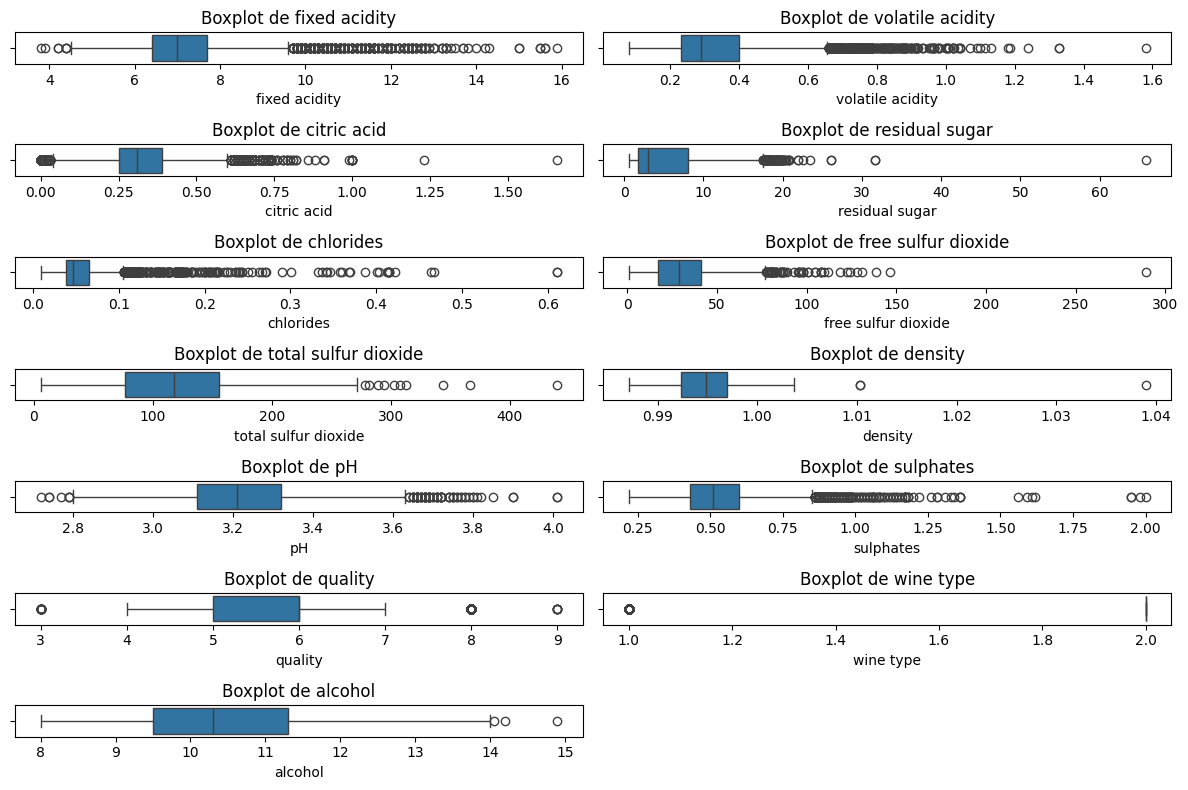

In [89]:
# Seleccionar las columnas numéricas para el análisis de outliers
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear gráficos de boxplot para cada característica numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

El dataset cuenta con las siguientes variables:  

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- quality
- winetype
- alcohol

Sería de interés eliminar o sustituir (por otros coherentes) valores que no tengan sentido.

Como no somos expertos en el campo, vamos a estudiar un subconjunto de las variables para la limpieza del dataset, y posteriormente decidiremos la forma de eliminar outliers sobre el conjunto completo de variables.

Subconjunto sobre el que se hace limpieza:
- citric acid
- pH
- quality
- winetype
- alcohol

Aunque **fixed acidity** y **volatile acidity** son valores importantes no somos expertos y se definen a partir de la combinación de ácidos de distintos tipos, los excluimos del analisis inicial en limpieza y solo nos fijamos en **citric acid**.  

La variable **citric acid** nos indica la acidez que aporta el ácido cítrico, el cual es un ácido no volátil (en inglés non volatiles o **fixed acids**) que deberá estar correlacionado con los valores de la variable **fixed acid**.

##### Variable: **citric acid**

Investigando un poco podemos suponer que la variable **citric acid** se expresa concentración, la cual se suele expresar en g/L, algo lógico al estar la media en 0.3 que tiene sentido estando el rango habitual(*) entre 0 y 1 g/L.

(*Fuente: https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman.#:~:text=El%20%C3%A1cido%20c%C3%ADtrico%20est%C3%A1%20presente,1%2D1%20g%2Fl.)

In [90]:
df.describe().drop('count').T.loc[['citric acid'], :]

,mean,std,min,25%,50%,75%,max
citric acid,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66


No obstante, el máximo supera 1g/L lo cual no es posible al ser este el actual límite
jurídico europeo(*).  

(*Fuente: https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)

In [91]:
c_acid_ilegal = df.loc[:, 'citric acid'] > 1
print('Número de vinos ilegales:', c_acid_ilegal.sum())
df[c_acid_ilegal].head()

Número de vinos ilegales: 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,6,2,12.2
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,6,2,13.1


Se eliminan:

In [92]:
df = df[~c_acid_ilegal]
len(df)

6495

##### Variable: **pH**

En cuanto a la variable **pH** los valores normales oscilan entre 3 y 4 (*), nuestros valores mínimo y máximo son 2.72 y 4.01 el valor máximo no se aleja del rango pero si que ocurre con el mínimo.

(*Fuente: https://www.hannainst.es/blog/1513/pH-en-la-elaboracion-del-vino#:~:text=La%20mayor%C3%ADa%20de%20los%20vinos,m%C3%A1s%20comunes%20para%20los%20tintos.)

Tomamos la decisión de aquellos por debajo de 3 convertirlos a 3 y aquellos por encima de 4 (aunque solo 0.01) convertirlos a 4:

In [93]:
ph_lt_3 = df.loc[:, 'pH'] < 3
ph_gt_4 = df.loc[:, 'pH'] > 4

print('Número de vinos con pH < 3:', ph_lt_3.sum())
print('Número de vinos con pH > 4:', ph_gt_4.sum())

df.loc[ph_lt_3, 'pH'] = 3
df.loc[ph_gt_4, 'pH'] = 4

print('Conversión a rango [3, 4]')
df.describe().drop('count').T.loc[['pH'], :]

Número de vinos con pH < 3: 466
Número de vinos con pH > 4: 2
Conversión a rango [3, 4]


,mean,std,min,25%,50%,75%,max
pH,3.223012,0.153063,3.0,3.11,3.21,3.32,4.0


Se ha tomado esta decisión en vez de eliminar o sustituir por una medida de centralización como la media, por ser simple y no estar los valores excesivamente alejados (tan solo 0.3 unidades como mucho del rango)

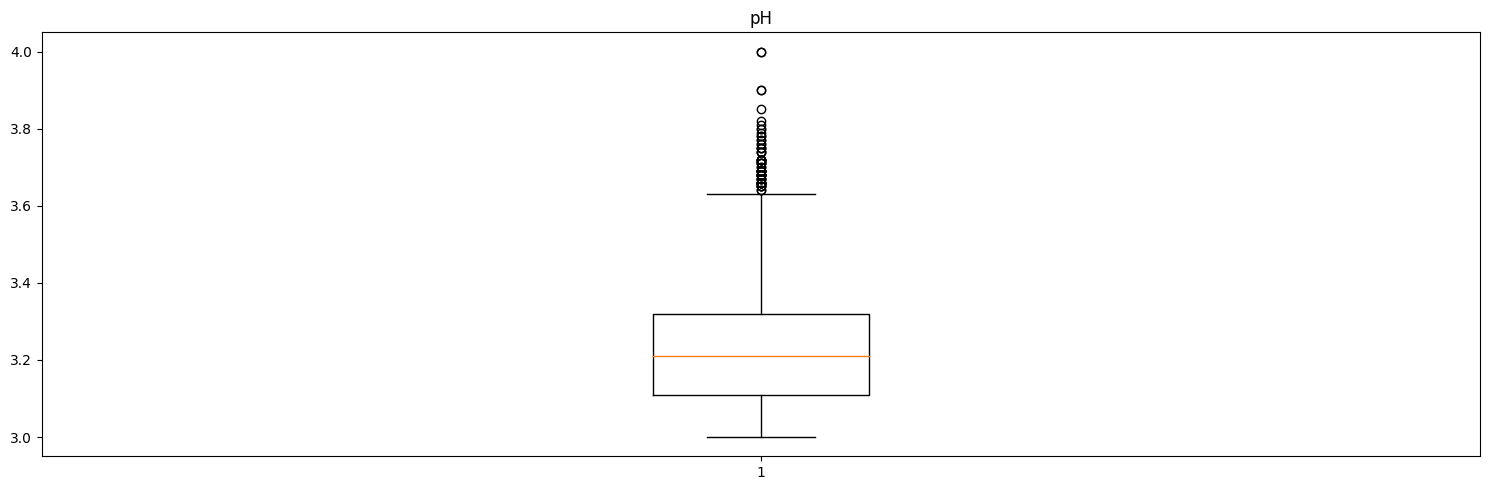

In [94]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['pH'])
axs.set_title('pH')

plt.tight_layout()

plt.show()

Aunque sigan existiendo outliers que se alejan de la muestra ahora se ha pasado a un rango más adecuado y estos tienen sentido.

##### Variable: **quality**

Existen 7 tipos de calidades registradas:

In [95]:
possible_qualities = df['quality'].unique()
possible_qualities

array([5, 6, 7, 4, 8, 3, 9])

Podemos ver su distribución mediante un diagram de barras:

<BarContainer object of 7 artists>

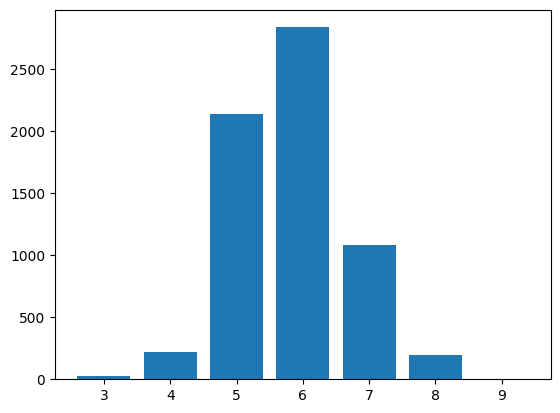

In [96]:
quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

<BarContainer object of 3 artists>

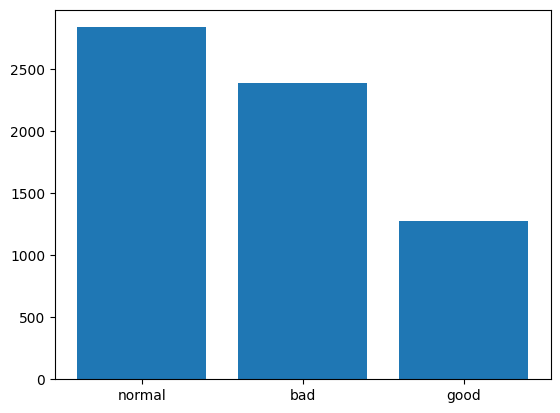

In [97]:
var = 'quality'

bad = df.loc[:, var] <= 5
normal = df.loc[:, var] == 6
good = df.loc[:, var] > 6

df.loc[bad, var] = 'bad'
df.loc[normal, var] = 'normal'
df.loc[good, var] = 'good'

quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Comprobamos que ha tenido éxito la transformación

In [98]:
df.loc[:, ['quality']].head()

,quality
id,
0,bad
1,bad
2,bad
3,normal
4,bad


##### Variable: **winetype**

La variable **wine type** no sabemos como se ha estimado, pero es sencilla, solo toma dos valores:

In [99]:
df['wine type'].unique()

array([1, 2])

Se trata de un tipo de vino, esto es, una variable categórica binaria.

Existen más vinos que pertenecen al tipo 2 que al tipo 1:

In [100]:
winetype_freq = df['wine type'].value_counts()
winetype_freq

wine type
2    4896
1    1599
Name: count, dtype: int64

Con un diagrama de barras se observa mejor:

<BarContainer object of 2 artists>

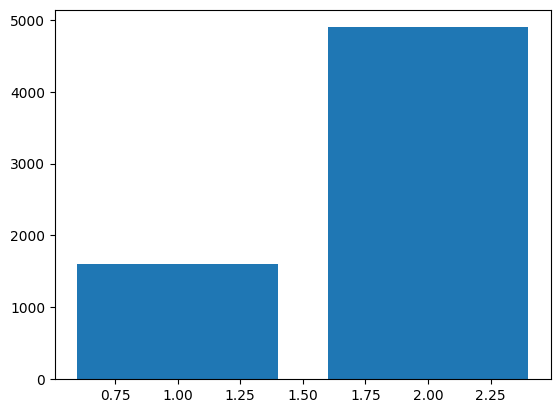

In [101]:
plt.bar(winetype_freq.index, winetype_freq.values)

No tenemos opciones sencillas para igualar la representación.

##### Variable: **alcohol**

El alcohol en el vino se expresa en tanto por ciento y ronda entre 5.5% y 25%. Lo cual es coherente con los valores del dataset (suponemos que utilizan esta métrica).

In [102]:
df.describe().drop('count').T.loc[['alcohol'], :]

,mean,std,min,25%,50%,75%,max
alcohol,10.491136,1.192268,8.0,9.5,10.3,11.3,14.9


Con un boxplot nos hacemos idea de la cantidad de outliers y como se distribuyen los valores de la variable:

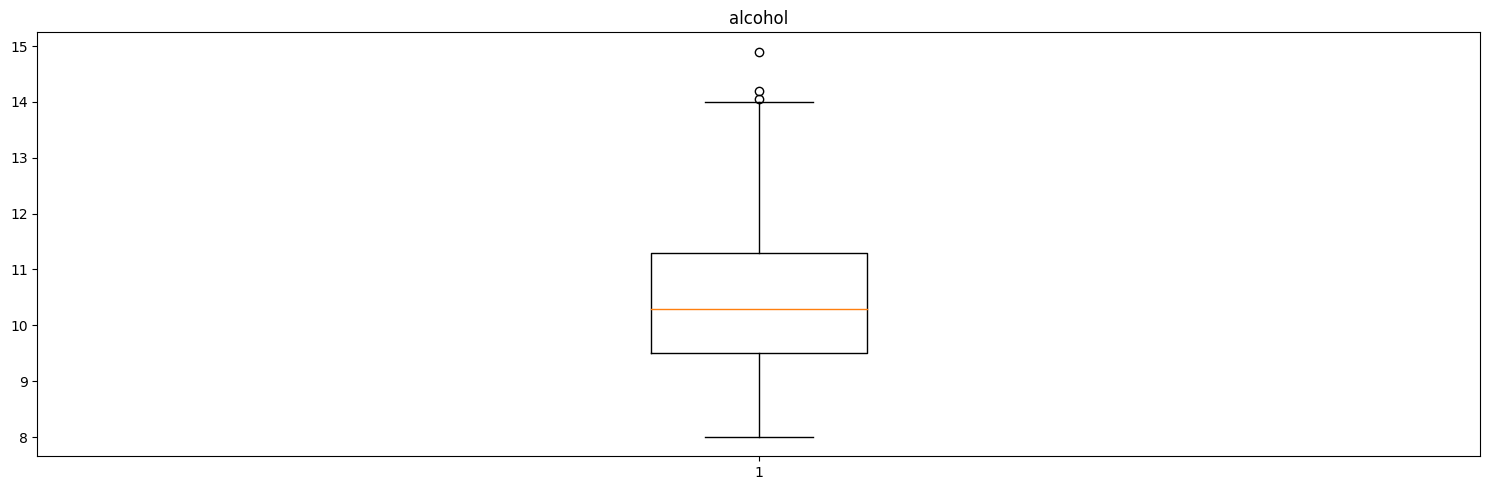

In [103]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['alcohol'])
axs.set_title('alcohol')

plt.tight_layout()

plt.show()

Como ya hemos mencionado es conveniente trabajar con las variables **quality** y **wine type** como variables categóricas.

La librería pandas dispone de un tipo categórico llamado **"category"** pero para el tipo de algoritmo no interesa convertir a **"object"**.

In [104]:
categorical_vars = ['quality', 'wine type']
df[categorical_vars] = df[categorical_vars].astype('object')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bad,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,bad,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,bad,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,normal,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bad,1,9.4


### TODO: Outliers

Finalmente una vez se han estudiado este subconjunto de variables, se realiza una eliminación de outliers utilizando el rango intercuartílico (IQR).

Se define una función para obtener un pandas dataframe con los límites a partir de los que categorizamos como outlier utilizando IQR:

In [105]:
import pandas as pd

def get_outlier_bounds(df:pd.DataFrame, selected_cols:list):
    selected_df = df[selected_cols]

    # Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
    Q1 = selected_df.quantile(0.25)
    Q3 = selected_df.quantile(0.75)

    IQR = Q3 - Q1
    outliers_range = 1.5 * IQR

    lower_bound = Q1 - outliers_range
    upper_bound = Q3 + outliers_range

    outlier_bounds = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})

    return outlier_bounds


get_outlier_bounds(df, ['pH']).head()

,lower_bound,upper_bound
pH,2.795,3.635


Para saber cuando quitar outliers lo que haremos será ver si escasean (bajo un cierto umbral) en cuyo caso eliminaremos.

In [106]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)
df_bounds = get_outlier_bounds(df_non_categorical, df_non_categorical.columns)
df_bounds

,lower_bound,upper_bound
fixed acidity,4.450000,9.650000
volatile acidity,-0.025000,0.655000
citric acid,0.040000,0.600000
residual sugar,-7.650000,17.550000
chlorides,-0.002500,0.105500
free sulfur dioxide,-19.000000,77.000000
total sulfur dioxide,-41.500000,274.500000
density,0.985365,1.003965
pH,2.795000,3.635000
sulphates,0.175000,0.855000


In [107]:
outliers_count = {}

for columna in df_bounds.index:
    lower_bound = df_bounds.loc[columna, 'lower_bound']
    upper_bound = df_bounds.loc[columna, 'upper_bound']
    outliers_count[columna] = ((df[columna] < lower_bound) | (df[columna] > upper_bound)).sum()

outliers_count

{'fixed acidity': 357,
 'volatile acidity': 377,
 'citric acid': 507,
 'residual sugar': 118,
 'chlorides': 286,
 'free sulfur dioxide': 62,
 'total sulfur dioxide': 9,
 'density': 3,
 'pH': 66,
 'sulphates': 191,
 'alcohol': 3}

De manera arbitraria vamos a elegir eliminar los outliers de una variable de manera aditiva hasta reducir en un 5% el tamaño del dataset:

### TODO: Eliminar variables fijándonos en correlación

# 2)

Para ver la relación entre las variables obtenemos la matriz de correlación (omitimos variables categóricas)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6495 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6495 non-null   float64
 1   volatile acidity      6495 non-null   float64
 2   citric acid           6495 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6495 non-null   float64
 6   total sulfur dioxide  6495 non-null   float64
 7   density               6495 non-null   float64
 8   pH                    6495 non-null   float64
 9   sulphates             6495 non-null   float64
 10  quality               6495 non-null   object 
 11  wine type             6495 non-null   object 
 12  alcohol               6495 non-null   float64
dtypes: float64(11), object(2)
memory usage: 710.4+ KB


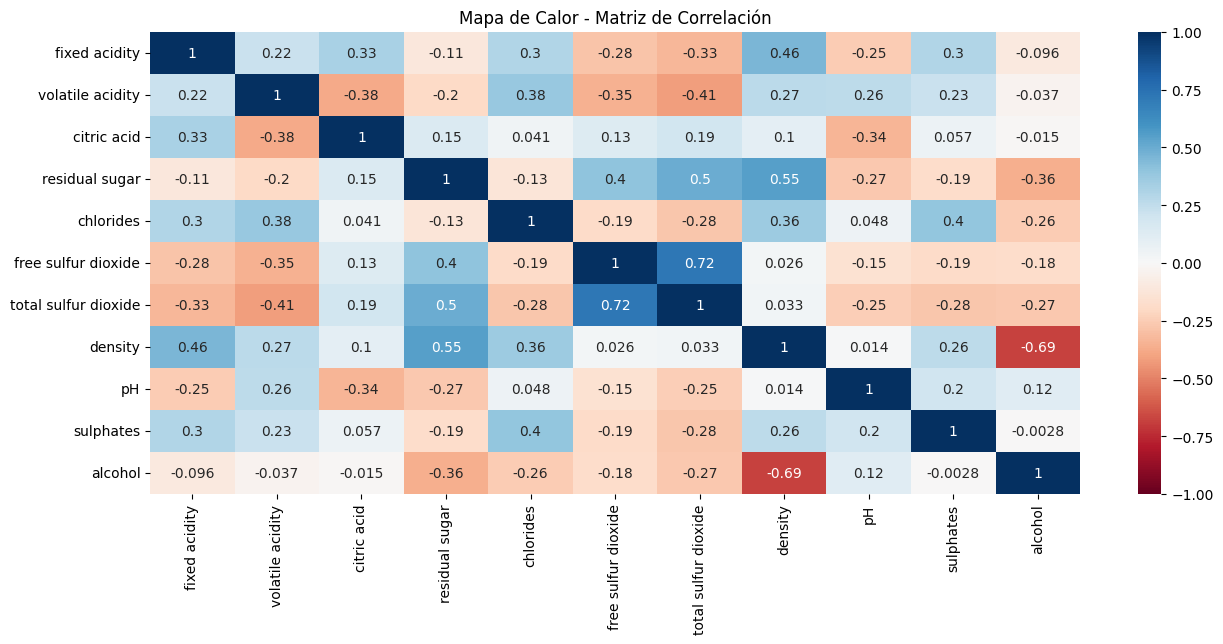

In [109]:
import seaborn as sns

categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.heatmap(df_non_categorical.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Como se puede observar de estos valores, las dos variables con las correlaciones más fuertes con el nivel de alcohol son:

**Density:** Con un coeficiente de -0.69, esta es la variable con la correlación más fuerte y negativa con el nivel de alcohol. Esto implica que a medida que aumenta la densidad del vino, el nivel de alcohol tiende a disminuir. Dado que el alcohol es menos denso que el agua, un aumento en el contenido de alcohol generalmente reduce la densidad del vino.

**Residual Sugar:** Con un coeficiente de -0.36, esta variable tiene la segunda correlación más fuerte y también negativa con el nivel de alcohol. La presencia de azúcares residuales en altas concentraciones generalmente se asocia con un nivel más bajo de alcohol, ya que indica que no todo el azúcar se ha fermentado para convertirse en alcohol.

Asimismo, nos resulta llamativo que todos los atributos a excepción del "pH" tienen coeficientes negativos, lo que implica que el pH es el único elemento cuya presencia suele implicar mayor nivel de alcohol. Como ya ha sido mencionado, las variables más significativas son "Density" y "Residual sugar", pero además de esas dos, "chlorides"(-0.26), "total sulfur dioxide"(-0.27), "free sulfur dioxide"(-0.18) y "pH"(0.12) también tienen coeficientes que pueden llegar a ser algo explicativos.
El resto de coeficientes son despreciables pues el nivel de significancia es realmente pequeño.

#3)

Pasamos ahora a estandarizar los datos, para ello nos servimos de la clase **MinMaxScaler** de **scikit-learn**, esta nos permite llevar los datos a un rango [0, 1].
Antes de aplicar dicha transformación, dividimos los datos en dos subconjuntos de forma aleatoria: datos de entrenamiento (80%) y datos de prueba(20%)

Aplicamos esta transformación sobre los datos que hemos estimado como no categóricos:

In [110]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [111]:
scaler = MinMaxScaler()
numeric_vars = df_train.select_dtypes(exclude='object').columns
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
3802,0.347458,0.086667,0.39,0.021472,0.079734,0.137457,0.366158,0.089647,0.05,0.168539,bad,2,0.483333
947,0.381356,0.133333,0.48,0.023006,0.139535,0.034364,0.016644,0.134374,0.26,0.224719,good,1,0.733333
877,0.330508,0.423333,0.01,0.023006,0.091362,0.206186,0.102635,0.127241,0.41,0.196629,normal,1,0.633333
3145,0.203390,0.100000,0.36,0.254601,0.049834,0.247423,0.343967,0.238095,0.23,0.117978,normal,2,0.133333
4464,0.237288,0.120000,0.56,0.226994,0.073090,0.213058,0.374480,0.211876,0.11,0.151685,bad,2,0.216667


Destacar que **fit_transform():**  es un método combinado que primero calcula el mínimo y el máximo de los datos (fit) y luego transforma los datos en el rango [0, 1] usando esos valores mínimos y máximos (transform). Con  **df_train[numeric_vars] =:** reemplazamos las columnas numéricas originales en df_train con sus versiones escaladas, normalizando todos los datos numéricos.

Ahora aplicamos la transformación aprendida con los datos de entrenamiento al conjunto de prueba (importante no usar **fit_transform** pues queremos que ambos conjuntos de datos estén en la misma escala que es la de entrenamiento).

In [112]:
# Aplicar la misma transformación al conjunto de prueba (¡importante usar solo .transform aquí!)
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

Definimos las variables **'X'** para las características (en este caso, solo 'density' pues es regresión lineal simple y elegimos la más significativa) y **'y'** para la variable objetivo ('alcohol'); estas están separadas en entrenamiento y prueba.

In [113]:
# Definir las variables independiente (X) y dependiente (y) para ambos conjuntos
X_train = df_train[['density']]
y_train = df_train['alcohol']
X_test = df_test[['density']]
y_test = df_test['alcohol']

A continuación, creamos y entrenamos el modelo de regresión lineal para ver como se  utilizando los datos de entrenamiento. El modelo aprende cómo la variable 'density' se relaciona con 'alcohol'.

In [114]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Utilizamos los datos de prueba para predecir el porcentaje de alcohol basado en la densidad y evaluamos el rendimiento calculando el coeficiente de determinación **(R²)**, el error cuadrático medio **(MSE)** y la raíz del error cuadrático medio **(RMSE)** para evaluar el rendimiento del modelo.

In [115]:
# Predecir y evaluar el modelo con el conjunto de prueba
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir resultados del modelo
print(f"Coeficiente de pendiente (b1) para 'density': {model.coef_[0]:.4f}")
print(f"Coeficiente de determinación R^2: {r2:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de pendiente (b1) para 'density': -2.3183
Coeficiente de determinación R^2: 0.4960
Error cuadrático medio (MSE): 0.0211
Raíz del error cuadrático medio (RMSE): 0.1451


El coeficiente de pendiente indica el cambio en la variable dependiente (alcohol) por cada unidad de cambio en la variable independiente (density). Es decir, un coeficiente de -2.3183 sugiere que por cada aumento unitario en la densidad (en la escala transformada a Min-Max entre 0 y 1), el porcentaje de alcohol disminuirá en 2.3183 unidades.

El coeficiente de determinación **R²** indica la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes. Un R² de 0.4960 significa que aproximadamente el 49.60% de la variación en el porcentaje de alcohol puede ser explicada por las variaciones en la densidad. Esto refleja que es un predictor significativo (pues explica la mitad de la variabilidad), pero también que hay otros factores que afectan el porcentaje de alcohol que no están incluidos en este modelo (el resto de variables).

El Error Cuadrático Medio **(MSE)** representa la media de los cuadrados de los errores, es decir, el promedio de las diferencias al cuadrado entre los valores observados y los valores predichos. Un MSE de 0.0211 indica que las predicciones del modelo están bastante cerca de los valores reales, en promedio.

El **RMSE** es simplemente la raíz cuadrada del MSE y proporciona una medida de la magnitud del error en las mismas unidades que la variable de respuesta. Un RMSE de 0.1451 indica que las predicciones del modelo se desvían del valor real por aproximadamente 0.1451 unidades en la escala de porcentaje de alcohol. Considerando que la escala de alcohol va desde aproximadamente de 8% a 15%, el error es extremadamente pequeño.

Finalmente, generamos un gráfico de dispersión que muestra tanto los valores reales como los predichos para proporcionar una visualización clara de cómo el modelo ha actuado con respecto a los datos reales.

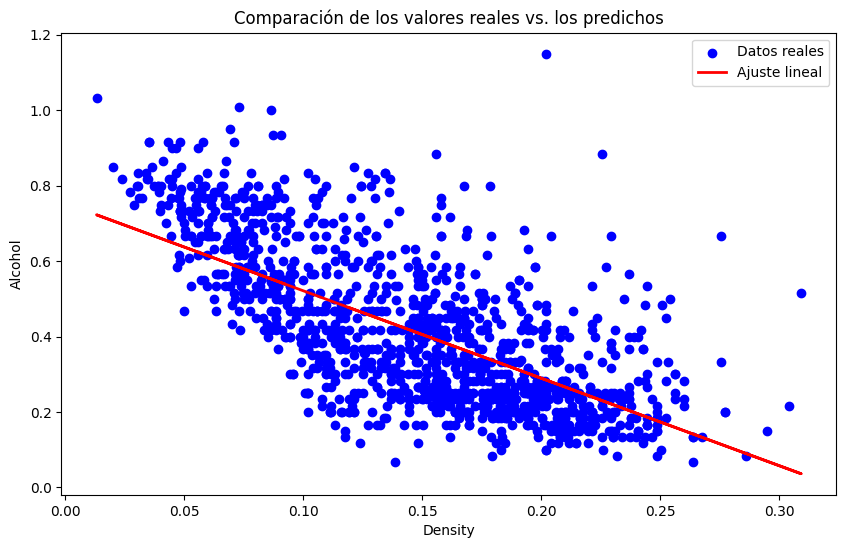

In [116]:
# Gráfico de dispersión de los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ajuste lineal')
plt.title('Comparación de los valores reales vs. los predichos')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

Teniendo en cuenta el gráfico y los datos obtenidos anteriormente, podemos concluir que el modelo predice bastante bien el porcentaje de alcohol basado en la densidad. Esto se aprecia especialmente en las métricas de error, que sugieren predicciones muy precisas.

Sin embargo, observando el valor de R² (49,6%) podemos darnos cuenta que un modelo de regresión lineal múltiple con más predictores explicaría mejor la variable objetivo.

# 4)

Calculamos el **MAE**(mean absolute error) con la función **mean_absolute_error** que toma dos argumentos: los valores reales (y_test) y los valores predichos por el modelo (y_pred). Calcula el promedio de los valores absolutos de las diferencias entre los valores reales y predichos. El MAE proporciona una medida de la magnitud promedio de los errores sin considerar su dirección (es decir, ignora si la predicción es mayor o menor que el valor real).
Obtenemos un error bajo (0.1141), por lo que el modelo hace predicciones que están cerca de los valores reales.

In [117]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Absoluto Medio (MAE): 0.1141


Por último, calculamos y representamod con un gráfico de dispersión los residuos, que son calculados como la diferencia entre los valores reales (y_test) y los valores predichos (y_pred).
Estos residuos son el error de cada predicción individual.

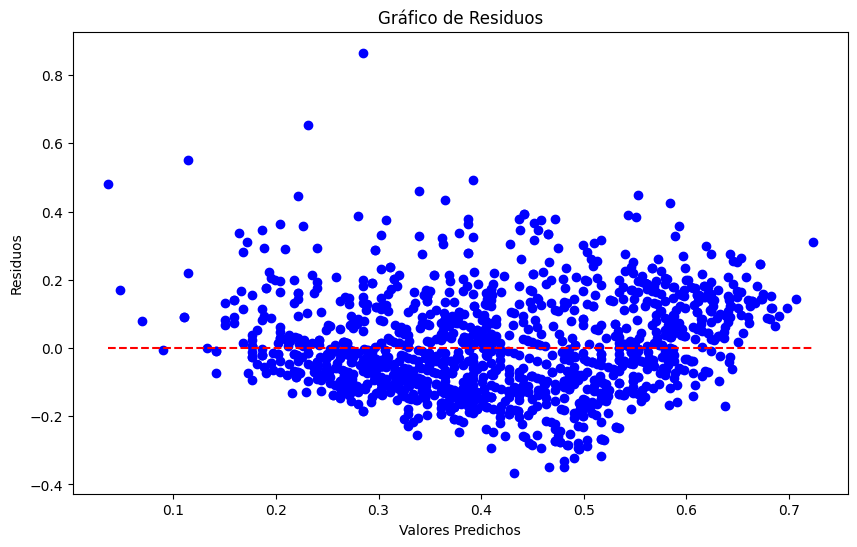

In [118]:
# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()